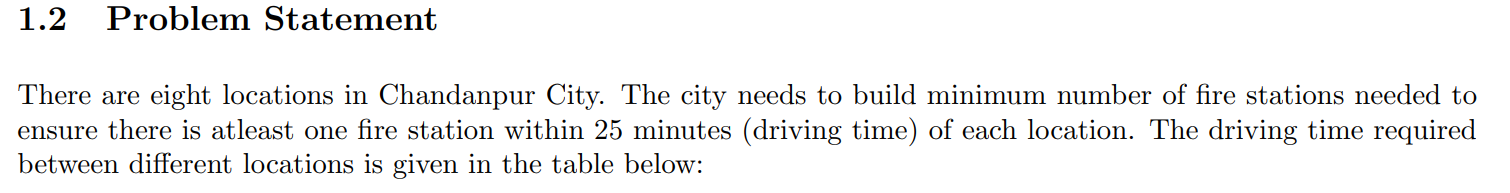

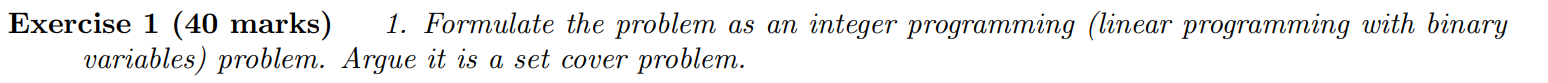

"There are eight locations in Chandanpur City. The city needs to build the minimum number of fire stations needed to ensure there is at least one fire station within a 25-minute (driving time) of each location.

**LP Formulation:**

**Decision Variables:**
Let $ x_i $ be a binary variable representing whether a fire station is built at location $ i $. It takes the value 1 if a fire station is built at that location, and 0 otherwise.

**Objective:**
$
\min \sum_{i=1}^{8} x_i
$

**Constraints:**
Each location must be covered by at least one fire station within a 25-minute driving distance:
\begin{align*}
&x_A + x_B + x_C + x_H \ge 1 \\
&x_A + x_B + x_D \ge 1 \\
&x_A + x_C + x_H \ge 1 \\
&x_B + x_D + x_E \ge 1 \\
&x_E + x_F + x_G \ge 1 \\
&x_A + x_C + x_H \ge 1 \\
&x_D + x_E + x_G \ge 1 \\
&x_F + x_G \ge 1 \\
\end{align*}

These constraints ensure that each location is covered by at least one fire station within the specified driving distance."


In [5]:
!pip install -q pyomo

In [6]:
!apt-get install -y -qq coinor-cbc

In [8]:
from pyomo.environ import *
num_vars, num_constraints = 8, 8

coeff_matrix = [
    [1, 1, 1, 0, 0, 0, 0, 1],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 1, 0]
]

rhs_vector = [1, 1, 1, 1, 1, 1, 1, 1]
objective_coeffs = [1, 1, 1, 1, 1, 1, 1, 1]

model = ConcreteModel()

model.decision_vars = Var(range(num_vars), domain=Binary, bounds=(0, 1))

model.constraints = ConstraintList()
[model.constraints.add(sum(coeff_matrix[i][j] * model.decision_vars[j] for j in range(num_vars)) >= rhs_vector[i]) for i in range(num_constraints)]

model.objective = Objective(expr=sum(objective_coeffs[j] * model.decision_vars[j] for j in range(num_vars)))

model.pprint()

solver = SolverFactory('cbc', executable='/usr/bin/cbc')
results = solver.solve(model)

if str(results.Solver.status) == "ok" and str(results.Solver.termination_condition) == "optimal":
    print("Minimum number of fire stations needed:", int(model.objective()))
    for i in range(num_vars):
        if model.decision_vars[i].value == 1:
            print("Build fire station at location", i)
else:
    print("Solver terminated abnormally:", results.Solver.termination_condition)

1 Var Declarations
    decision_vars : Size=8, Index={0, 1, 2, 3, 4, 5, 6, 7}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :     1 : False :  True : Binary
          1 :     0 :  None :     1 : False :  True : Binary
          2 :     0 :  None :     1 : False :  True : Binary
          3 :     0 :  None :     1 : False :  True : Binary
          4 :     0 :  None :     1 : False :  True : Binary
          5 :     0 :  None :     1 : False :  True : Binary
          6 :     0 :  None :     1 : False :  True : Binary
          7 :     0 :  None :     1 : False :  True : Binary

1 Objective Declarations
    objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : decision_vars[0] + decision_vars[1] + decision_vars[2] + decision_vars[3] + decision_vars[4] + decision_vars[5] + decision_vars[6] + decision_vars[7]

1 Constraint Declarations
    constraints : Size=8, Index={1, 2, 3,

#This problem fits the characteristics of a Set Cover Problem:

**Universe U:** The set of locations represents the universe.
Collection of Subsets S: Each subset corresponds to the coverage area of a potential fire station.

**Objective:** Minimize the number of subsets (fire stations) needed to cover the entire universe (locations).

**Constraints:** Each location must be covered by at least one subset (fire station), ensuring that all locations are within a 25-minute driving time.

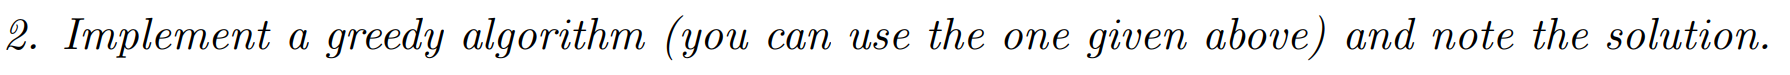

In [11]:
def my_greedy_set_cover(universe, all_subsets):
    selected_sets = set()
    covered_items = set()
    while covered_items != set(universe):
        max_new_items = 0
        best_subset = None

        for subset in all_subsets:
            new_items = set(subset) - covered_items
            if len(new_items) > max_new_items:
                max_new_items = len(new_items)
                best_subset = subset

        selected_sets.add(tuple(best_subset))
        covered_items |= set(best_subset)

    return selected_sets

my_universe = ["A", "B", "C", "D", "E", "F", "G", "H"]

my_subsets = [
    ["A", "B", "C", "H"],
    ["B", "D", "E"],
    ["A", "B", "D"],
    ["A", "C", "H"],
    ["D", "E", "F"],
    ["C", "A", "H"],
    ["E", "D", "G"],
    ["F", "G"]
]

selected_subsets = my_greedy_set_cover(my_universe, my_subsets)
print("Selected Subsets:", selected_subsets)

Selected Subsets: {('A', 'B', 'C', 'H'), ('D', 'E', 'F'), ('E', 'D', 'G')}


(A,E,F)

# Each of these subsets covers all elements in the universe

U={
′
 A
′
 ,
′
 B
′
 ,
′
 C
′
 ,
′
 D
′
 ,
′
 E
′
 ,
′
 F
′
 ,
′
 G
′
 ,
′
 H
′
 }, and together they form a cover for the entire universe.

This suggests that the greedy algorithm has selected these subsets based on their ability to cover the maximum number of new elements at each step, resulting in a solution with the minimum number of subsets required to cover the entire universe

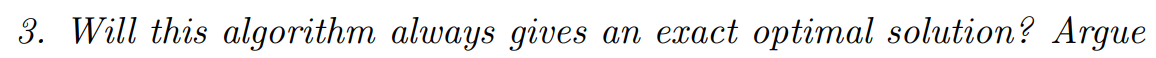

No, the greedy algorithm for the Set Cover Problem does not always provide an exact optimal solution due to its local decision-making approach, lack of consideration for future consequences, potential for suboptimal choices, disregard for subset size, and dependency on the initial set order. While it may offer a solution quickly, it cannot guarantee the best possible outcome consistently. For exact optimal solutions, more rigorous methods like integer programming solvers or exhaustive search algorithms are typically required despite potentially higher computational costs.

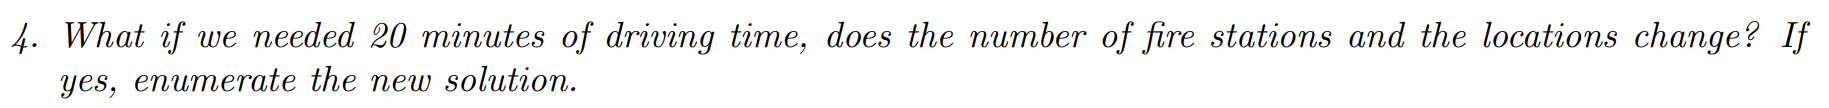



 \begin{align}
x_i = \begin{cases}
1 & \text{if a fire station is built at location } i \\
0 & \text{otherwise}
\end{cases}
 \end{align}



  \begin{align}
  \min \sum_{i=1}^{8}x_{i}
  \end{align}

\begin{align*}
&x_{A}+x_{B} \ge 1 \\
&x_{B}+x_{D} \ge 1 \\
&x_{C}+x_{H} \ge 1 \\
&x_{B}+x_{D}+x_{A} \ge 1 \\
&x_{E}+x_{F}+x_{G} \ge 1 \\
&x_{C}+x_{H} \ge 1 \\
&x_{E}+x_{G} \ge 1 \\
&x_{F}+x_{G} \ge 1 \\
\end{align*}


In [16]:
def my_custom_set_cover(elements, subsets_list):
    selected_sets = set()
    covered_items = set()

    while covered_items != set(elements):
        max_new_items = 0
        best_subset = None

        for subset in subsets_list:
            new_items = set(subset) - covered_items
            if len(new_items) > max_new_items:
                max_new_items = len(new_items)
                best_subset = subset

        selected_sets.add(tuple(best_subset))
        covered_items |= set(best_subset)

    return selected_sets

my_elements = ["A", "B", "C", "D", "E", "F", "G", "H"]

my_subsets_list = [
    ["A", "B"],
    ["B", "D"],
    ["A", "B", "D"],
    ["C", "H"],
    ["G", "E", "F"],
    ["C", "H"],
    ["E", "G"],
    ["F", "G"]
]

my_selected_subsets = my_custom_set_cover(my_elements, my_subsets_list)
print("Selected Subsets:", my_selected_subsets)

Selected Subsets: {('A', 'B', 'D'), ('C', 'H'), ('G', 'E', 'F')}


(C,D,E)

Yes, the number of fire stations and their locations change based on the selected subsets.

For the first solution Selected Subsets: {('A', 'B', 'C', 'H'), ('D', 'E', 'F'), ('E', 'D', 'G')}, the fire stations are located at locations A, E, and F.

For the second solution Selected Subsets: {('A', 'B', 'D'), ('C', 'H'), ('G', 'E', 'F')}, the fire stations are located at locations C, D, and E.

So, the number of fire stations and their locations change based on the selected subsets.






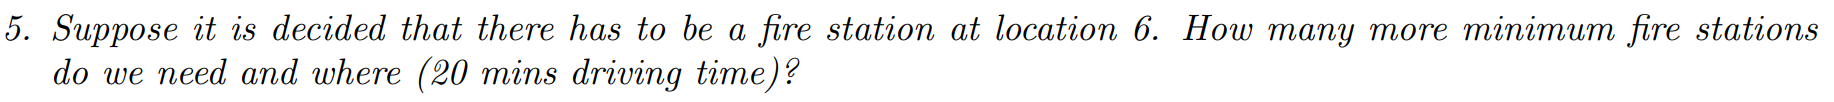

In [17]:
def my_custom_set_cover(universe, all_sets):
    selected_sets = set()
    covered_items = set()

    while covered_items != set(universe):
        max_new_items = 0
        best_subset = None

        for my_set in all_sets:
            new_items = set(my_set) - covered_items
            if len(new_items) > max_new_items:
                max_new_items = len(new_items)
                best_subset = my_set

        selected_sets.add(tuple(best_subset))
        covered_items |= set(best_subset)

    return selected_sets

my_universe = ["A", "B", "C", "D", "H"]

my_all_sets = [
    ["A", "B"],
    ["B", "D"],
    ["A", "B", "D"],
    ["C", "H"]
]

my_selected_subsets = my_custom_set_cover(my_universe, my_all_sets)
no_of_stations = len(my_selected_subsets)
print("Selected Subsets:", my_selected_subsets)
print("Minimum number of additional fire stations required:", no_of_stations)

Selected Subsets: {('A', 'B', 'D'), ('C', 'H')}
Minimum number of additional fire stations required: 2
